**Proyecto Final, Statistical Learning I**


```
# Fase 1
```


**Luis Adolfo Martinez  - 22000352** 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.utils import resample
from joblib import load
import os
from sklearn import tree
from scipy.special import softmax
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
direccion = "/content/drive/MyDrive/Dataset/"
os.chdir(direccion)

In [4]:
#Cargamos dataset de validación que realizamos en la primera parte
df_titanic_validacion = pd.read_csv('titanic_validacion.csv')
df_titanic_validacion
df_titanic_validacion

,Unnamed: 0,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,734,0.283740,0,0,0.025374,0,2,0,0
1,469,0.004147,2,1,0.037590,1,0,1,1
2,847,0.434531,0,0,0.015412,1,0,0,0
3,363,0.434531,0,0,0.013761,0,0,0,0
4,406,0.635587,0,0,0.015127,0,0,0,0
...,...,...,...,...,...,...,...,...,...
138,627,0.258608,0,0,0.152164,0,1,1,1
139,181,0.346569,0,0,0.029376,1,2,0,0
140,528,0.484795,0,0,0.015469,0,0,0,0
141,513,0.673285,1,0,0.115941,1,1,1,1


#**Cargamos el árbol**

In [5]:
modelo_tree = load('log_tree/model_tree20220629-011115_maxDepth=7_splitter=best.joblib')
feature=['Age','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex']

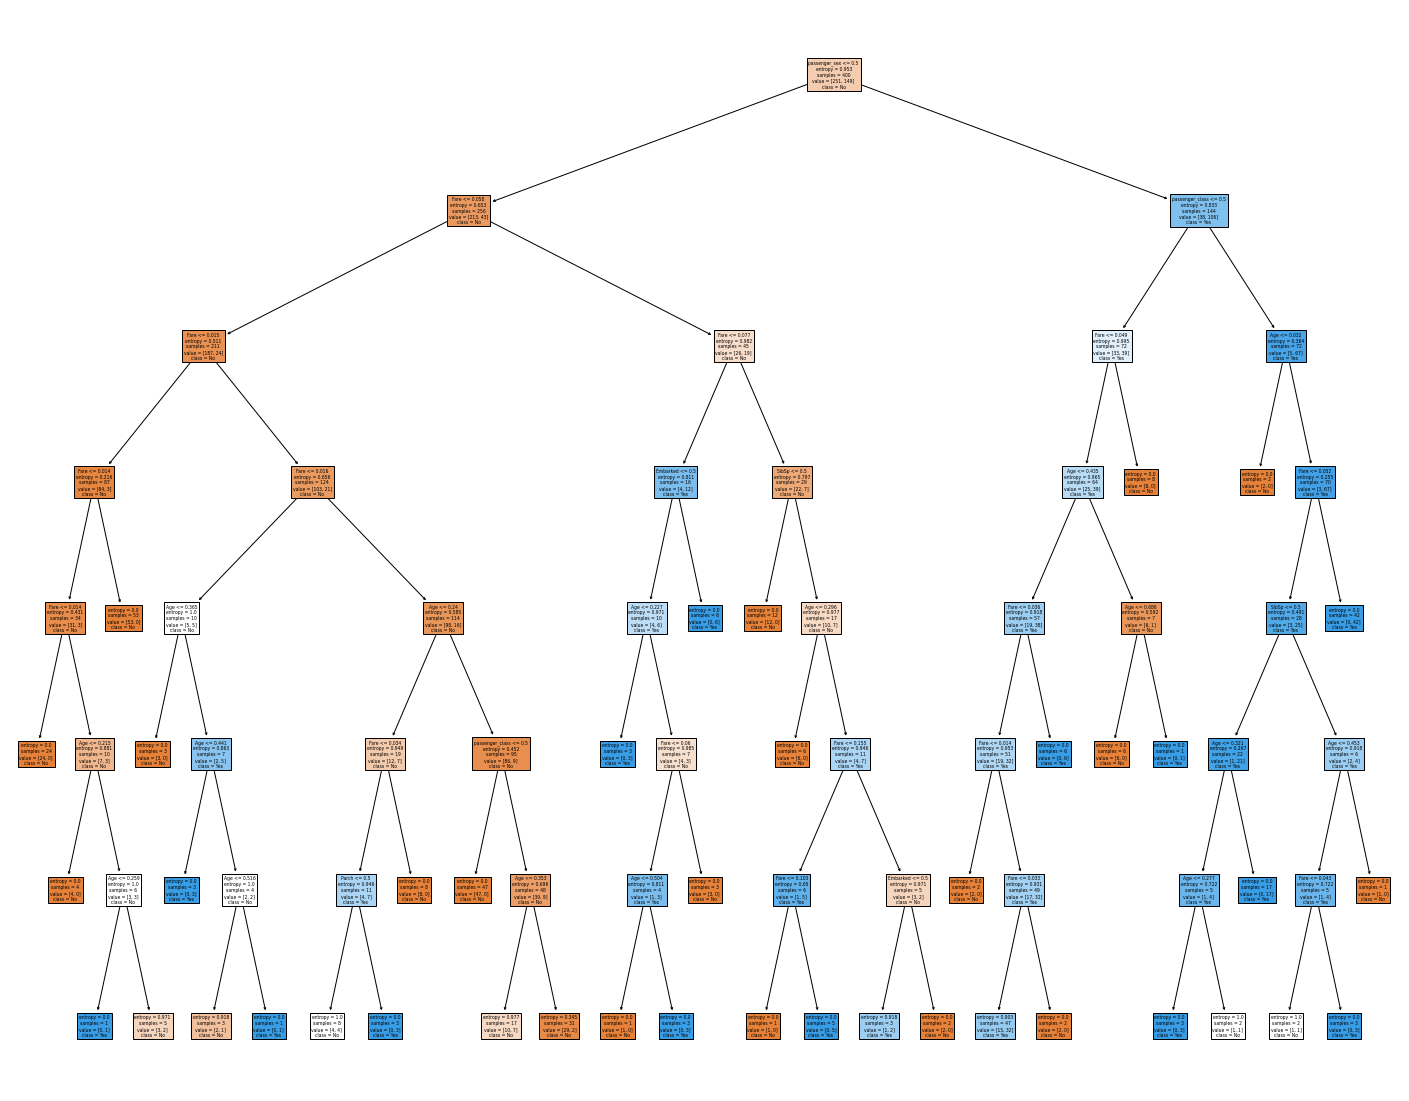

In [6]:
target_names = ['No','Yes']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(modelo_tree, 
                   feature_names=feature,  
                   class_names=target_names,
                   filled=True)

# Modelo SVM

In [7]:
modelo_SVM = load('log_svm/mod_svm_20220629-011544_kernel=rbf_gamma=auto_degree=6.joblib') 
feature_names = ['Age','SibSp','Parch','Fare','Embarked','passenger_class','passenger_sex']

# **Modelo logistc Regresión**

In [8]:
class class_predict_lr:
    def __init__(self,feature_names,b, bias):
        self.modelo = None
        self.feature_names = feature_names
        self.b = b
        self.bias = bias
    def predict(self, df):
        local = df[self.feature_names].to_numpy()
        y = np.matmul(local, self.b) + self.bias
        resultado = np.argmax(softmax(y), axis=1)
        return resultado

In [9]:
data = pd.read_csv('Log_Reg/rlg_20220629-012133_lr=0.015_reg=0.005_batch=34_ephocs=2001.csv', header=None,names=['id', 'vars','b','bias'])
t1 = data['b'][0].split(',')
t2 = np.array(t1,float)
bias = np.array(data['bias'][0].split(','),float)
lr_modelo = class_predict_lr(data['vars'][0].split(','), t2.reshape(7,2), bias)


In [10]:
modelos = [modelo_tree,modelo_SVM,lr_modelo] ##,modelo_lr,modelo_SVM]
modelos

[DecisionTreeClassifier(criterion='entropy', max_depth=7),
 SVC(degree=6, gamma='auto', probability=True),

In [11]:
def predict_ensable(modelos, data):
    y_pred = []
    for m in modelos:
        y_pred.append(m.predict(data[feature])[0])
    conteo = stats.mode(y_pred)
    y_pred.append(conteo[1][0])
    y_pred.append(conteo[0][0])
    return y_pred

In [12]:
nuevo = df_titanic_validacion


In [13]:
del nuevo['Unnamed: 0']

In [14]:
nuevo

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,0.283740,0,0,0.025374,0,2,0,0
1,0.004147,2,1,0.037590,1,0,1,1
2,0.434531,0,0,0.015412,1,0,0,0
3,0.434531,0,0,0.013761,0,0,0,0
4,0.635587,0,0,0.015127,0,0,0,0
...,...,...,...,...,...,...,...,...
138,0.258608,0,0,0.152164,0,1,1,1
139,0.346569,0,0,0.029376,1,2,0,0
140,0.484795,0,0,0.015469,0,0,0,0
141,0.673285,1,0,0.115941,1,1,1,1


In [15]:
def predecion_model(modelos,data,inicio,fin,tamanio):
  dat = []
  valores = np.random.randint(inicio,fin, size=tamanio)
  for i in valores:
      t = predict_ensable(modelos,data[i:i+1])
      t.append(data[i:i+1]['passenger_survived'].to_numpy()[0])
      dat.append(t)
  dat_resu = pd.DataFrame(dat,columns=['Modelo D Tree','modelo_SVM','RegresionLog','Cantidad','Ensable','Real'])
  return dat_resu

In [16]:
resultado = predecion_model(modelos,nuevo,1,100,40)
resultado

,Modelo D Tree,modelo_SVM,RegresionLog,Cantidad,Ensable,Real
0,0,0,0,3,0,0
1,0,0,0,3,0,0
2,0,0,0,3,0,0
3,0,1,1,2,1,1
4,0,0,0,3,0,0
5,1,1,1,3,1,1
6,1,1,1,3,1,1
7,1,0,0,2,0,0
8,1,1,1,3,1,1
9,1,1,1,3,1,1


In [17]:
def parametros(resultado):
  confusion = confusion_matrix(resultado['Real'], resultado['Ensable']).ravel()
  
  precision =confusion[3] / (confusion[3] + confusion[1])
  recall =confusion[3] / (confusion[3] + confusion[2])
  F = (2 * precision * recall) / (precision + recall)
  
  return precision*100, recall*100, F*100

In [18]:
precision,recall,f = parametros(resultado)

print('Precision: ', precision, '\nRecall: ',recall, '\nF: ', f)


Precision:  90.47619047619048 
Recall:  86.36363636363636 
F:  88.37209302325581
